# GRIP_TASK_6 : Prediction using Decision Tree Algorithm

@AJAY_KASHYAP

***TASK_GUIDELINES*** \
● Create the Decision Tree classifier and visualize it graphically. \
● The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly. \
● Dataset : https://bit.ly/3kXTdox \
● Sample Solution : https://bit.ly/2G6sYx9 \
-------------------------------------------------------------------------------------------------------------------------------------

**STEP_1 - Importing all libraries required in this notebook**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**STEP_2 - Loading data**

In [2]:
data = pd.read_csv('Iris.csv')
print("Data imported successfully")

data.head()

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Step-3:Data preprocessing**

In [3]:
data['Species'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1,'Iris-virginica':2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [5]:
# removing id column
df = data.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Step-4:Splitting into input and target variable**

In [6]:
X = df.iloc[:, :-1] 
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y =df.iloc[:, -1:] 
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


**Step-5:Test-Train Split**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=13)

In [10]:
X_train.shape

(120, 4)

In [11]:
X_test.shape

(30, 4)

**Step-6:Buidling Decision tree algorithm**

In [12]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)


In [13]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [15]:
y_test_pred

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2], dtype=int64)

**Step-7:Evaluating model**

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
confusion_matrix(y_train, y_train_pred)

array([[41,  0,  0],
       [ 0, 42,  0],
       [ 0,  3, 34]], dtype=int64)

In [18]:
confusion_matrix(y_test, y_test_pred)

array([[ 9,  0,  0],
       [ 0,  8,  0],
       [ 0,  2, 11]], dtype=int64)

In [19]:
print(f'Accuracy Score of our model is {round(accuracy_score(y_test, y_test_pred)*100,2)} %')

Accuracy Score of our model is 93.33 %


**Step-8:Displaying our decision tree**

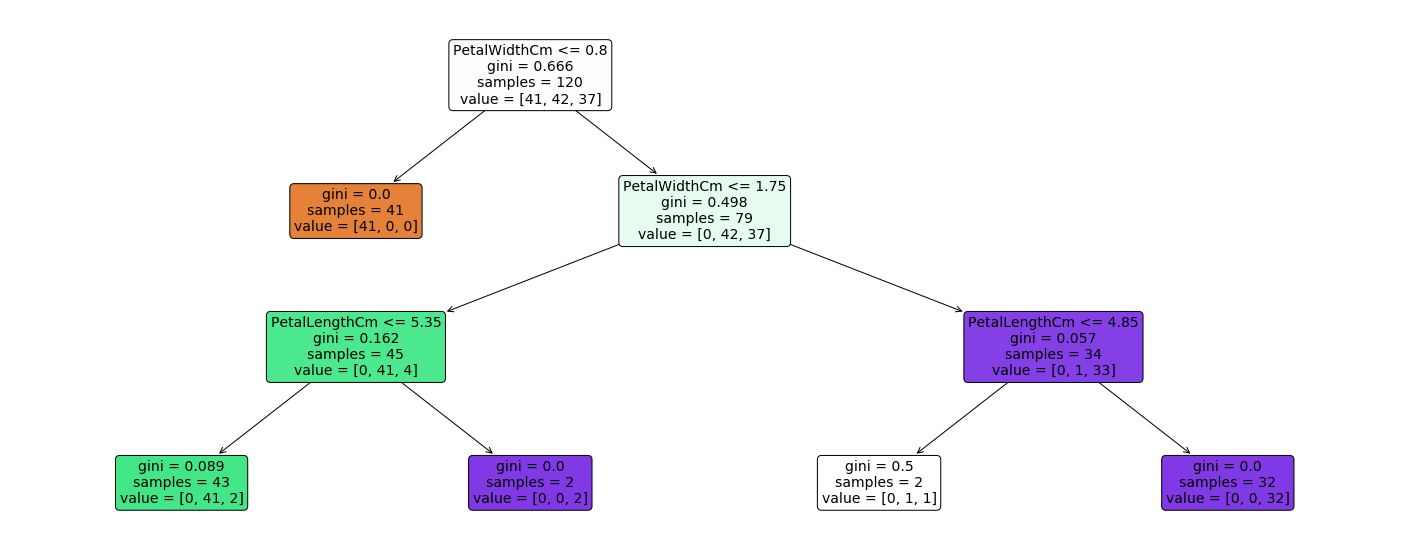

In [20]:
plt.figure(figsize=(25,10))
a = tree.plot_tree(clftree, feature_names= X_train.columns, filled=True,rounded=True,fontsize=14)

**Predicting for new sample**

In [21]:
new_data = {'SepalLengthCm' : [4.9 ,5.9] ,
            'SepalWidthCm': [3.5,3.0] ,
            'PetalLengthCm':[1.5,5.1] ,
            'PetalWidthCm':[0.3,1.6]
           }
new_data

{'SepalLengthCm': [4.9, 5.9],
 'SepalWidthCm': [3.5, 3.0],
 'PetalLengthCm': [1.5, 5.1],
 'PetalWidthCm': [0.3, 1.6]}

In [22]:
input_data = pd.DataFrame.from_dict(new_data)
input_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.9,3.5,1.5,0.3
1,5.9,3.0,5.1,1.6


In [23]:
new_pred = clftree.predict(input_data)

In [24]:
input_data['predicted_species'] = new_pred
input_data['predicted_species'] =  input_data['predicted_species'].map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})

input_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predicted_species
0,4.9,3.5,1.5,0.3,Iris-setosa
1,5.9,3.0,5.1,1.6,Iris-versicolor
